In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/bank_customer_segmentation/german_credit_data.xls')

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [6]:
df.drop(df.columns[0], inplace = True, axis = 1)

In [7]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Out of 9 columns, 2 contains missing values. Probably these are cutomers who don't have one of these two accounts.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [8]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

object - categorical data type

int64 - numeric data type

In [29]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [30]:
df[df.duplicated()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose


In [9]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

In [10]:
for col in df.select_dtypes(include = [object]):
  print(col, ":", df[col].unique())

Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


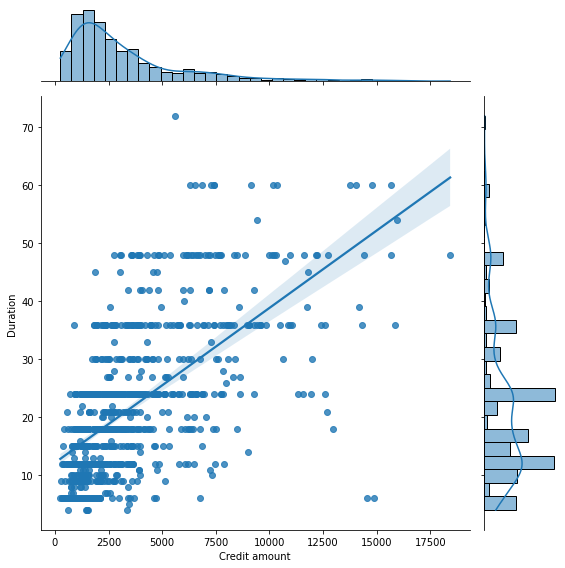

In [17]:
import scipy.stats as stats 
r1 = sns.jointplot(x = 'Credit amount', y = 'Duration', data = df, kind = 'reg', height = 8)
plt.show()

Plot shows a linear correlation. It makes sense because usually, people take bigger credits for longer periods.

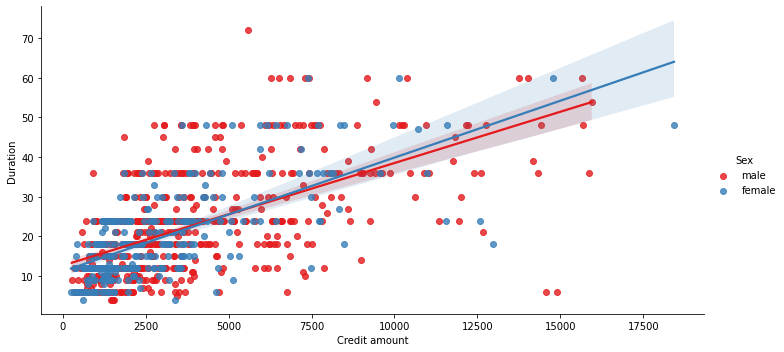

In [18]:
sns.lmplot(x = 'Credit amount', y = 'Duration', hue = 'Sex', data = df, palette = 'Set1', aspect = 2)
plt.show()

The plot above indicates that there is no significant difference between men and women in terms of credit amount.

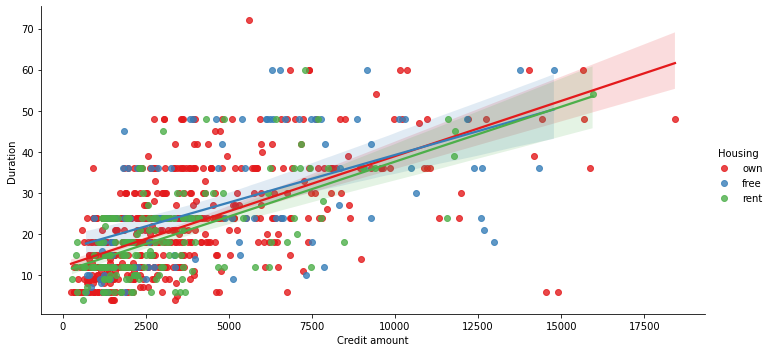

In [19]:
sns.lmplot(x = 'Credit amount', y = 'Duration', hue = 'Housing', data = df, palette = 'Set1', aspect = 2)
plt.show()

The plot above indicates that there is no significant difference between people housing conditions in terms of credit amount that they borrowed.

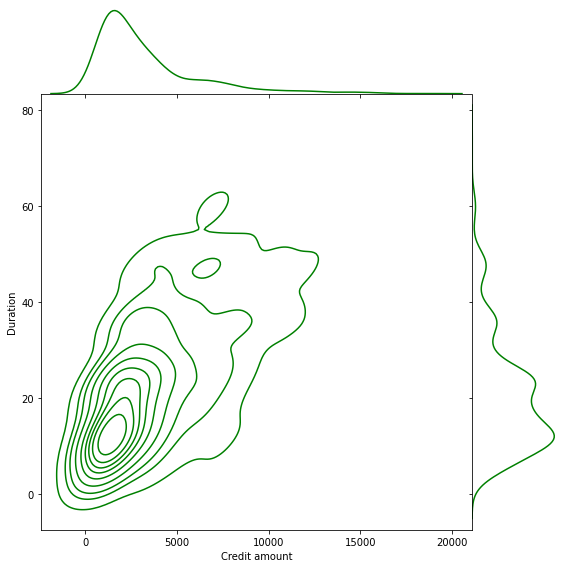

In [21]:
sns.jointplot(x = 'Credit amount', y = 'Duration', data = df, kind = 'kde', space = 0, color = 'g', height = 8)
plt.show()

In [24]:
def boxes(x, y, h, r = 45):
  fig, ax = plt.subplots(figsize = (10, 6))
  box = sns.boxplot(x = x, y = y, hue = h, data = df)
  box.set_xticklabels(box.get_xticklabels(), rotation = r)
  fig.subplots_adjust(bottom = 0.2)

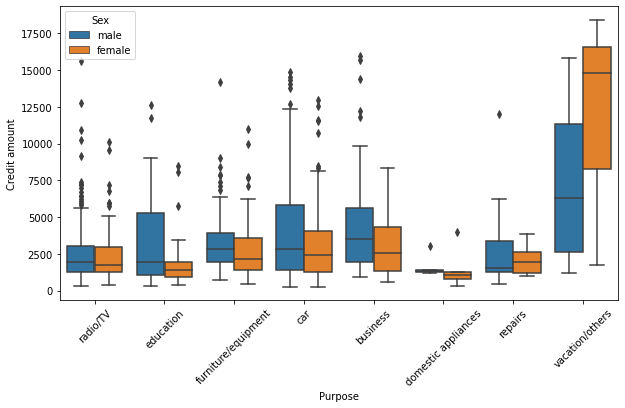

In [25]:
boxes('Purpose', 'Credit amount', 'Sex')

The plot above shows that the biggest amounts are taken for vacation/others, the smallest for domestic appliances. Most of them have outliers on the upper side of the boxes (higher amounts). In most of the cases there is no difference between men and women, despite category vacation/others.

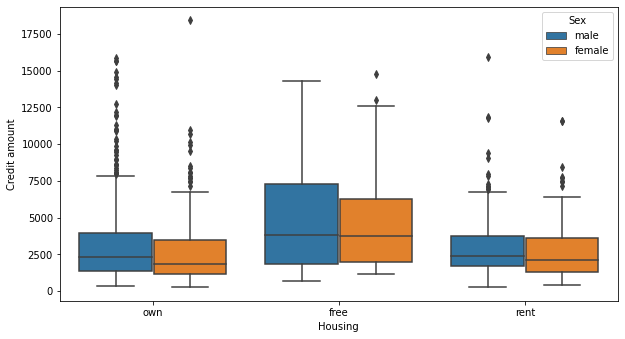

In [26]:
boxes('Housing', 'Credit amount', 'Sex', r = 0)

In terms of housing category, there is no big difference except people having 'free' housing tend to take slightly bigger credit amounts.

Text(0.5, 0, 'Age')

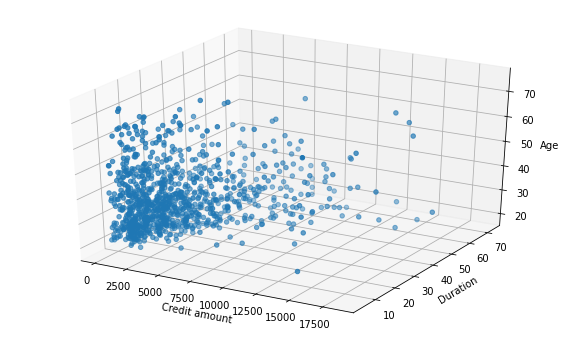

In [28]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['Credit amount'], df['Duration'], df['Age']) 
ax.set_xlabel('Credit amount') 
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

# **Data Processing and Feature Engineering**

In [32]:
df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace = True)
df['Checking account'].fillna(df['Checking account'].mode()[0], inplace = True) 